#  Overview

The Terry Stops problem aims to predict the outcome of police stops based on reasonable suspicion using a classification model. The model considers various factors such as presence of weapons, time of day, and possibly gender and race of both the officer and the subject. However, the use of race and gender data raises ethical concerns and the importance of avoiding bias and discrimination must be taken into consideration. The goal of this model is to improve the efficiency and fairness of law enforcement actions, but the agencies must also monitor and address any potential biases.

# 1. Business Understanding


## 1.1. Problem
The Terry Stops presents a business opportunity to improve the efficiency and fairness of law enforcement actions. By developing a predictive model that can assist officers in determining the likelihood of an arrest being made during a Terry Stop, the law enforcement agencies can make informed decisions and potentially reduce the number of false arrests and incidents of police misconduct. However, it is important to approach this problem with caution and transparency, considering the ethical concerns raised by the use of gender and race data. The goal is to provide a tool that can help improve policing, while avoiding biases and discrimination.

## 1.2 Aim

The aim of this project is to build a classifier that can predict the outcome of a Terry Stop (whether an arrest was made or not) based on reasonable suspicion. This will be done by considering various factors such as the presence of weapons, time of day of the call, and other relevant information. The model will be designed to address the binary classification problem, with the goal of improving the efficiency and fairness of law enforcement actions.

## 1.3. 0bjectives
* To create a predictive model for Terry Stops that accurately predicts the outcome of the stop (arrest made or not)
* To take into consideration key factors such as the presence of weapons and the time of the call in the model
* To ensure that the model is ethically sound and avoids any biases or discrimination related to gender and race.

# 2. Data Understanding

## 2.1 Data Understanding
This dataset was provided by the City of Seattle and is managed by the Seattle Police Department. It was created on April 13, 2017 and last updated on February 6, 2023. The dataset contains **54873**, rows and **23** columns, each row representing a unique Terry Stop record as reported by the officer conducting the stop. The columns in the dataset include information about the subject of the stop, such as the perceived age group, perceived race, and perceived gender. 

The dataset also includes information about the officer, such as the officer's gender, race, and year of birth. Additionally, the dataset includes information about the resolution of the stop, any weapons found, the date and time the stop was reported, and information about the underlying Computer Aided Dispatch (CAD) event. The data is updated daily and is licensed under the public domain.

# 3. Requirements

* Data Preparation -> Loading Libraries -> Loading data -> Descriptive Exploration -> Data Cleaning -> Exploratory Descriptive Analysis (EDA) -> Pre-processing Data

* Modelling -> Train test split -> Logistic Regression -> K-Nearest -> Decision Tree -> Logistic Regression -> Random Forest
    
* Evaluation -> Classification Metrics -> Best Perfoming Model

* Conclusion -> Best Model
    
* Recommendation -> Most imporatnt features

# 4. Data Preparation

* Loading Libraries 
* Loading data 
* Descriptive Exploration
* Data Cleaning 
* Exploratory Descriptive Analysis (EDA) 
* Pre-processing Data
    * >Update the Stop Resolution column to either be arrested (1) or not arrested (0):
    * >Change the date column to datetime so we can work with it. Add in the month as a new column:
    * >Group weapons into firearms vs. non-firearms vs. no weapon:
    * >Change Officer year of bith to give the officer age:
    * >Drop columns that we are not going to need:
    * >Converting categorical data to numeric format through label encoder

### 4.1. Loading Libraries

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.2. Loading Data

In [2]:
# read the csv file to pandas data frame
Tery_df = pd.read_csv("data/Terry_Stops.csv")

# make copy
Tery_stops_df = Tery_df.copy(deep=True) 

# preview the first 3 rows
Tery_stops_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,-,-,-,SOUTH PCT 3RD W - ROBERT,N,N,-,-,-
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1


### 4.2.1 Dataset Columns
##### These are the  23 columns, with a concise explanation of the information contained in each column :



**Subject Age Group:** Subject Age Group (10 year increments) as reported by the officer.

**Subject ID:** Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name. "Null" values indicate an "anonymous" or "unidentified" subject. Subjects of a Terry Stop are not required to present identification.

**GO/SC Num:** General Offense or Street Check number, relating the Terry Stop to the parent report. This field may have a one to many relationship in the data.

**Terry Stop ID:** Key identifying unique Terry Stop reports.

**Stop Resolution:** Resolution of the stop as reported by the officer.

**Weapon Type:** Type of weapon, if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

**Officer ID:** Key identifying unique officers in the dataset.

**Officer YOB:** Year of birth, as reported by the officer.

**Officer Gender:** Gender of the officer, as reported by the officer.

**Officer Race:** Race of the officer, as reported by the officer.

**Subject Perceived Race:** Perceived race of the subject, as reported by the officer.

**Subject Perceived Gender:** Perceived gender of the subject, as reported by the officer.

**Reported Date:** Date the report was filed in the Records Management System (RMS). Not necessarily the date the stop occurred but generally within 1 day.

**Reported Time:** Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours.

**Initial Call Type:** Initial classification of the call as assigned by 911.

**Final Call Type:** Final classification of the call as assigned by the primary officer closing the event.

**Call Type:** How the call was received by the communication center.

**Officer Squad:** Functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP).

**Arrest Flag:** Indicator of whether a "physical arrest" was made, of the subject, during the Terry Stop. Does not necessarily reflect a report of an arrest in the Records Management System (RMS).

**Frisk Flag:** Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the Terry Stop.

**Precinct:** Precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Sector:** Sector of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.

**Beat:** Beat of the address associated with the underlying Computer Aided Dispatch (CAD) event. Not necessarily where the Terry Stop occurred.




### 4.3.  Descriptive Exploration
Describing the data set in terms of shape and the data types for all the columns present. Most of the columns are categorical and have the 'object' datatype.

In [3]:
# a function to summarise the data set
# check number of categorical and numerical columns
def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [4]:
# call the function  
columns_dtypes(Tery_stops_df)

This dataset has 54873 rows and 23 columns

Numerical columns: 4
Categorical columns: 19

These are the datatypes of column :


Subject Age Group           object
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object

### 4.4 Data Cleaning

Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps
* handling missing values
* removing duplicates
* correcting data format
* transforming variables to make the data ready for modelling and predictions.

#### 4.4.1. Missing and Duplicate Values
A function to check duplicates and null

In [5]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # create result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() !=0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() !=0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [6]:
# call function on the dataset
check_duplicates_missing(Tery_stops_df)

Officer squad is the column with most null count.

No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
Subject Age Group,0.00,0,0.0
Subject ID,0.00,0,0.0
GO / SC Num,0.00,0,0.0
Terry Stop ID,0.00,0,0.0
Stop Resolution,0.00,0,0.0
Weapon Type,0.00,0,0.0
Officer ID,0.00,0,0.0
Officer YOB,0.00,0,0.0
Officer Gender,0.00,0,0.0
Officer Race,0.00,0,0.0


>I will drop the Officer Squad column because the null values equals to **37.78%**  and the information it contains I will not use for my analysis.

#### 4.4.2. Feature Engineering.
This are the steps taken in correcting data format:
* Update the Stop Resolution column to binary
* Change the date column to datetime
* Group weapons into firearms vs. non-firearms vs. no weapon
* Change Officer year of bith to give the officer age
* To categorize this time as either "daytime" or "nighttime"
* Drop columns that we are not going to need
* Converting categorical data to numeric format through one hot encoding

##### * Fix structural error

In [7]:
# replace with new stings
Tery_stops_df = Tery_stops_df.replace(["-"], "No Information")
Tery_stops_df.head(3)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,-1,20160000004638,207171,Field Contact,None,6970,1968,M,White,...,01:23:00.0000000,No Information,No Information,No Information,SOUTH PCT 3RD W - ROBERT,N,N,No Information,No Information,No Information
1,18 - 25,-1,20180000352673,484084,Offense Report,None,7794,1991,M,White,...,06:45:00.0000000,TRESPASS,TRESPASS,"TELEPHONE OTHER, NOT 911",NORTH PCT 1ST W - LINCOLN,N,N,North,L,L2
2,26 - 35,-1,20170000399165,325847,Offense Report,None,7795,1992,M,Hispanic or Latino,...,17:28:00.0000000,BURG - RES (INCL UNOCC STRUCTURES ON PROP),"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,EAST PCT 2ND W - CHARLIE RELIEF,N,N,East,C,C1


##### * Update the Stop Resolution column to binary

In [8]:
# get unique values in stop resolution
stop_resolution_unique = set(Tery_stops_df["Stop Resolution"])
print(f"before:\n{stop_resolution_unique}")

# update to binary the colum values
values = ['Arrest', 'Citation / Infraction', 'Field Contact', 'Offense Report', 'Referred for Prosecution']
conversion_dict = {val: 1 if val == 'Arrest' else 0 for val in values}

# update column in data frame
Tery_stops_df["Stop Resolution"] = Tery_stops_df["Stop Resolution"].map(conversion_dict)
print()
# check data type after update
new_stop_resolution_unique = set(Tery_stops_df["Stop Resolution"])
print(f"after:\n{new_stop_resolution_unique}")

before:
{'Offense Report', 'Field Contact', 'Arrest', 'Referred for Prosecution', 'Citation / Infraction'}

after:
{0, 1}


##### * Change the Reported Date column from object to datetime .

The data description, Reported Date, is the date the report was filed in the Records Management System (RMS). Not necessarily the date of the stop, but generally within one day.
Convert to date time so that I checked how different days and years affected the targert column

In [9]:
# convert to datetime type
Tery_stops_df['Reported Date'] = pd.to_datetime(Tery_stops_df['Reported Date'])

# extract day
Tery_stops_df['Day'] = Tery_stops_df['Reported Date'].dt.day

# extract year
Tery_stops_df['Year'] = Tery_stops_df['Reported Date'].dt.year

# xtract month
Tery_stops_df['Month'] = Tery_stops_df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})

>There are columns for the day, month and year for each of the Terry-stops in te datammset

##### * Group weapons

##### What is a firearm?

The general classification of firearms can be based on the following criteria: Level of harm they produce. Lethal - designed with the intent to eventually kill the target. Non-lethal - designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries.

This column shwed a list of the type weapons if any, identified during a search or frisk of the subject. Indicates "None" if no weapons was found.

In [10]:
# gets weapons category
weapons = list(dict(Tery_stops_df['Weapon Type'].value_counts()).keys())
print("These are the weapon classes :")
weapons

These are the weapon classes :


['None',
 'No Information',
 'Lethal Cutting Instrument',
 'Knife/Cutting/Stabbing Instrument',
 'Handgun',
 'Blunt Object/Striking Implement',
 'Firearm Other',
 'Firearm',
 'Club, Blackjack, Brass Knuckles',
 'Other Firearm',
 'Mace/Pepper Spray',
 'Firearm (unk type)',
 'Taser/Stun Gun',
 'None/Not Applicable',
 'Fire/Incendiary Device',
 'Club',
 'Rifle',
 'Shotgun',
 'Automatic Handgun',
 'Personal Weapons (hands, feet, etc.)',
 'Brass Knuckles',
 'Blackjack']

I will convert the firearm category to binary, it will be **Firearm** is designed with the intent to eventually kill the target and **Non Firearm** if designed with the intent to scare or incapacitate the target, without killing or producing major, irreversible injuries. 

In [11]:
# map the new values to the weapon found column
Tery_stops_df['Weapon Type'] = Tery_stops_df['Weapon Type'].map(
{
 'None': 'Non Firearm',
 '-': 'Non Firearm',
 'Lethal Cutting Instrument': 'Non Firearm',
 'Knife/Cutting/Stabbing Instrument': 'Non Firearm',
 'Handgun': 'Firearm',
 'Blunt Object/Striking Implement': 'Non Firearm',
 'Firearm Other': 'Firearm',
 'Firearm': 'Firearm',
 'Club, Blackjack, Brass Knuckles': 'Non Firearm',
 'Other Firearm': 'Firearm',
 'Mace/Pepper Spray': 'Non Firearm',
 'Firearm (unk type)': 'Firearm',
 'Taser/Stun Gun': 'Non Firearm',
 'None/Not Applicable': 'Non Firearm',
 'Fire/Incendiary Device': 'Non Firearm',
 'Club': 'Non Firearm',
 'Rifle': 'Firearm',
 'Shotgun': 'Firearm',
 'Automatic Handgun': 'Firearm',
 'Personal Weapons (hands, feet, etc.)': 'Non Firearm',
 'Brass Knuckles': 'Non Firearm',
 'Blackjack': 'Non Firearm'
 })

Most of the weapons were classified as Non Firearm

##### * Get  officer age using YOB
Using year of birth to get age of officer and see age relates to arrest. I use the current year to get age.

In [12]:
# get age by subtracting from current year 
Tery_stops_df['Officer Age'] = 2023 - Tery_stops_df["Officer YOB"]

##### * Convert time to binary
Reported Time: Time the stop was reported in the Records Management System (RMS). Not the time the stop occurred but generally within 10 hours
based on this column information, I used the reported time to group as either daytime or night time to try and see how it related to arrest being made.

In [13]:
# function to split time column and extract hour and group as night or day
def categorize_time(column):
    def categorize_time_helper(time):
        hour = int(time.split(":")[0])
        if hour >= 6 and hour < 18:
            return "Day"
        else:
            return "Night"

    return column.apply(categorize_time_helper)

In [14]:
# calling the function to get new column
Tery_stops_df["Time Category"] = categorize_time(Tery_stops_df["Reported Time"])    

#### * Frisk Flag and Arrest Flag
This column indicates whether a frisk was conducted during the stop. This column I converted into a binary variable, such as 1 for frisk conducted and 0 for no frisk conducted, and No information for -1, to allow for easier analysis and modeling.

In [15]:
# convert "Frisk Flag" into binary variable
Tery_stops_df['Frisk Flag'] = Tery_stops_df['Frisk Flag'].replace({'Y': 1, 'N': 0, 'No Information': -1})

# arrest flag
Tery_stops_df['Arrest Flag'] = Tery_stops_df['Arrest Flag'].replace({'Y': 1, 'N': 0})


####  * Converting the Precinct  Sector  and Beat columns.

The columns 'Precinct', 'Sector', and 'Beat' represent the location of a Terry Stop event. To better understand the relationship between location and outcome (whether an arrest was made or not), we can combine these three columns into one new column. This new column will have different categories, each category representing a unique combination of values from the three original columns. This new column can then be used in our analysis and modeling to see if there is a relationship between location and outcome.

In [16]:
# create a new feature by concatenating the precinct, sector, and beat columns
Tery_stops_df["Location"] = Tery_stops_df["Precinct"].astype(str) + "_" + Tery_stops_df["Sector"].astype(str) + "_" + Tery_stops_df["Beat"].astype(str)

# convert the new feature into a categorical variable
Tery_stops_df["Location"] = Tery_stops_df["Location"].astype("object")

# drop the original precinct, sector, and beat columns
Tery_stops_df.drop(["Precinct", "Sector", "Beat"], axis=1, inplace=True)


#### * Convert the Call Type column into a Categorical variable.

In [17]:
# drop categories with low frequency
call_type_value_counts = Tery_stops_df["Call Type"].value_counts()
to_remove = call_type_value_counts[call_type_value_counts <= 50].index
Tery_stops_df["Call Type"] = Tery_stops_df["Call Type"].apply(lambda x: np.nan if x in to_remove else x)
Tery_stops_df.dropna(subset=["Call Type"], inplace=True)

# convert the "Call Type" column into a categorical 
Tery_stops_df["Call Type"] = Tery_stops_df["Call Type"].astype("object")

#### * Converting the Subject Age Group column.

The code above is converting the "Subject Age Group" column from a categorical variable (text) into a numerical variable, so that the data can be more easily analyzed and used in modeling.

In [18]:
# create a mapping dictionary to map the age groups to numerical values
age_group_map = {"18 - 25": 0, "26 - 35": 1, "36 - 45": 2, "46 - 55": 3, "56 and Above": 4, "1 - 17": 5, "No Information": -1}

# use the `map` function to convert the "Subject Age Group" column into numerical values
Tery_stops_df["Subject Age Group"] = Tery_stops_df["Subject Age Group"].apply(lambda x: age_group_map[x])


##### Drop irrelevant columns

In [19]:
# get colulmns to drop
irrelevant_columns = [
'GO / SC Num',
'Officer YOB',
'Reported Date',
'Officer ID',
'Officer Race',
'Subject Perceived Race',
'Subject Perceived Gender',
'Reported Time',
'Officer Squad',
'Initial Call Type',
'Final Call Type',
'Subject ID',
'Day']

# drop the columns
df = Tery_stops_df.drop(irrelevant_columns, axis=1)

### Final features used for classification

* Subject Age Group
* Terry Stop ID
* Stop Resolution
* Weapon Type
* Officer Gender
* Call Type
* Arrest Flag
* Frisk Flag
* Year
* Month
* Officer Age
* Time Category
* Location

## 4.5. Exploratory Data Analysis

The dataset has an additional columns, during data processing I feature engineered columns to help in better understanding of any underlying patterns that would help make better predictions.

There are some columns that I will not use in my analysis and I drop the at this point, part of  final preparation before modelling.I'd like to point out that I'll be removing the subject's race and gender because these are only perceived by the officer and thus their accuracy cannot be trusted.

### Correlation

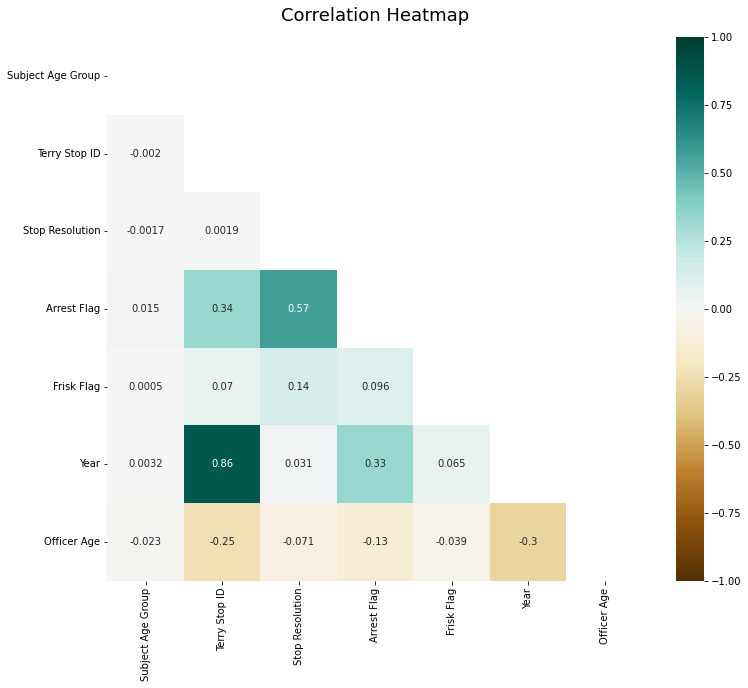

In [20]:
# function to plot correlation
def corre_plot(df):
    # mask    
    np.triu(np.ones_like(df.corr()))

    #visualize array
    plt.figure(figsize=(12, 10))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

    # show plot
    plt.show()
    
# call function
corre_plot(df)

>Flag arrest had the highest correlation with the target

#### Features Distribution

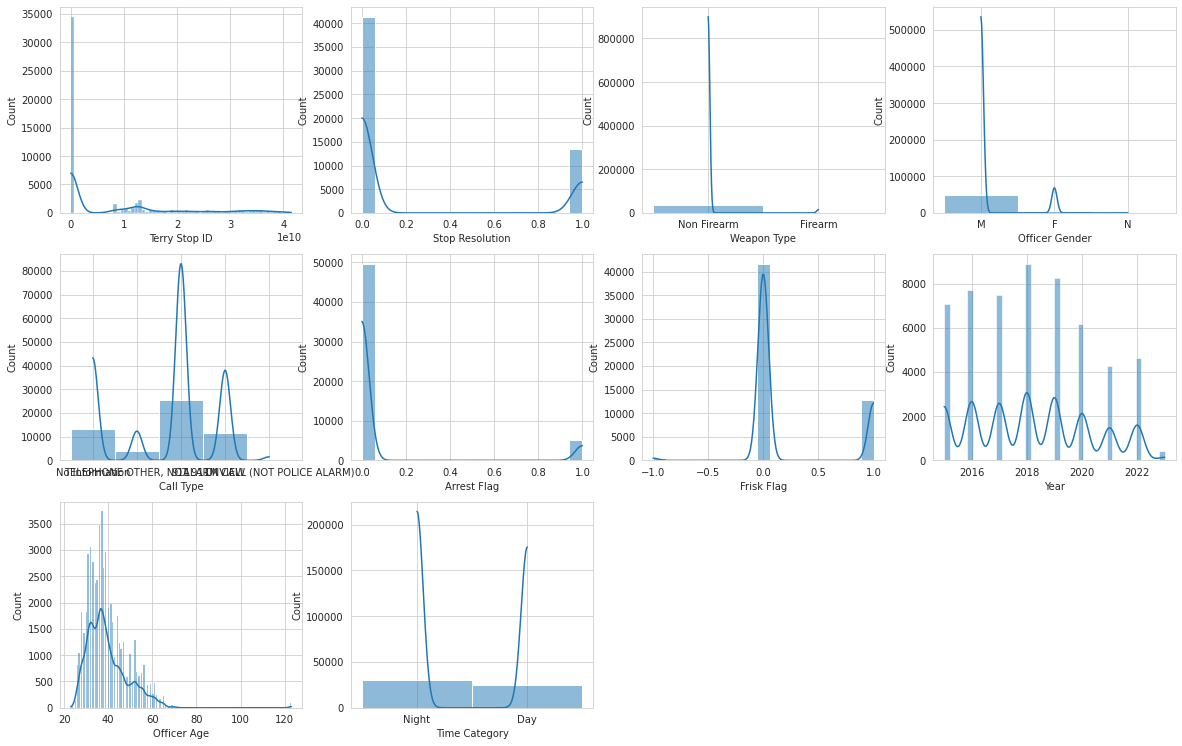

In [21]:
# check all columns distribution plot
def dist_check(my_data):
    sns.set_style('whitegrid')
    plt.figure(figsize=(20,22))
    for i in range(1,11):
        plt.subplot(5, 4, i)
        sns.histplot(my_data[my_data.columns[i]], kde=True)
        
#check distribution data
features = df.drop(["Month", "Location"], axis=1)
dist_check(features)        

>Most features are normaly distributed.

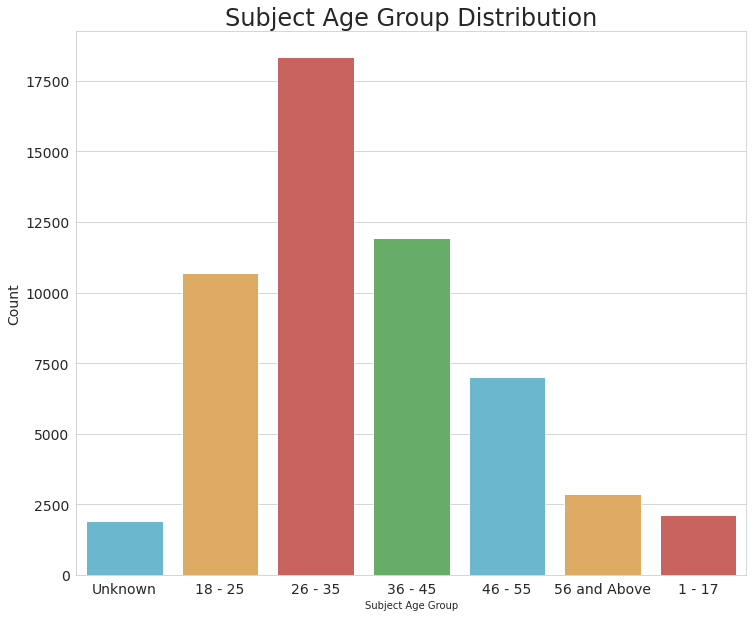

In [22]:
# set graph book
sns.set_style('whitegrid')
plt.subplots(figsize=(12 ,10))

custom_palette = ['#5bc0de', '#f0ad4e', '#d9534f', '#5cb85c']
sns.countplot(x='Subject Age Group', data=df, palette=custom_palette)

# set labels
plt.title('Subject Age Group Distribution',fontsize=24)
plt.xticks(range(7), ["Unknown", '18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 and Above', '1 - 17', ], fontsize=14)
plt.ylabel('Count',fontsize=14)

plt.tick_params(axis='both',labelsize=14)

# save visual
#plt.savefig(('class_plot.png'))

# show figure
plt.show()

>Most subjects involved were aged 26-35

#### 4.5.1  Target column

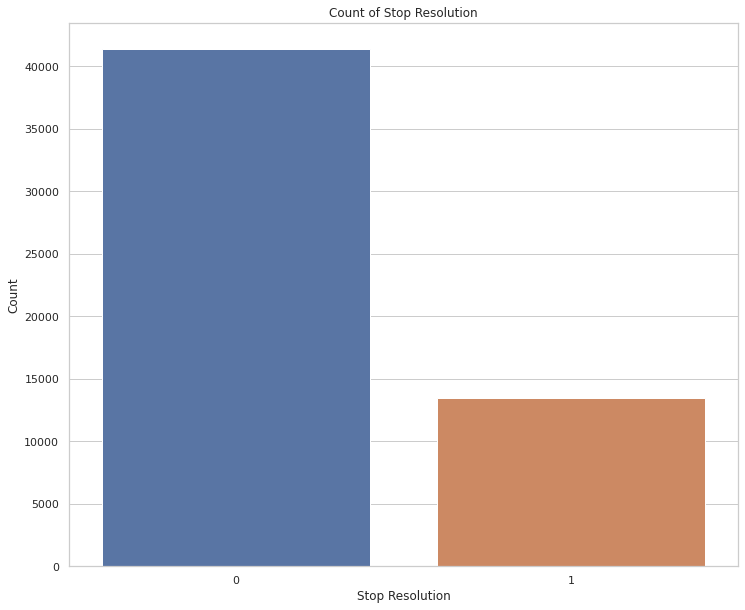

In [23]:
# create a bar plot of Stop Resolution count
sns.set(rc={'figure.figsize':(12,10)})
sns.set_style("whitegrid")
sns.countplot(x='Stop Resolution', data=df)

# add title and labels
plt.title("Count of Stop Resolution")
plt.xlabel("Stop Resolution")
plt.ylabel("Count")

# Show plot
plt.show()


>The target distribution was imbalanced.

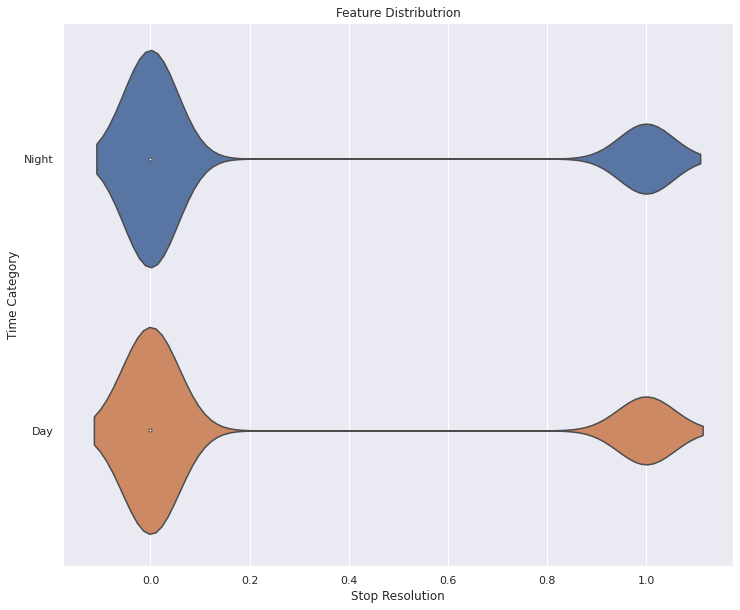

In [24]:
# select the features and target variable
features = ['Time Category']
target = 'Stop Resolution'

# create a violin plot for each feature
sns.set(rc={'figure.figsize':(12,10)})
for feature in features:
    sns.violinplot(x=target, y=feature, data=df)
    plt.title('Feature Distributrion')
    plt.show()


> This shows the distribution is symmetrical, meaning that the values are distributed evenly around the mean, and there are roughly equal numbers of values on either side of the mean

#### Arrest vs Date

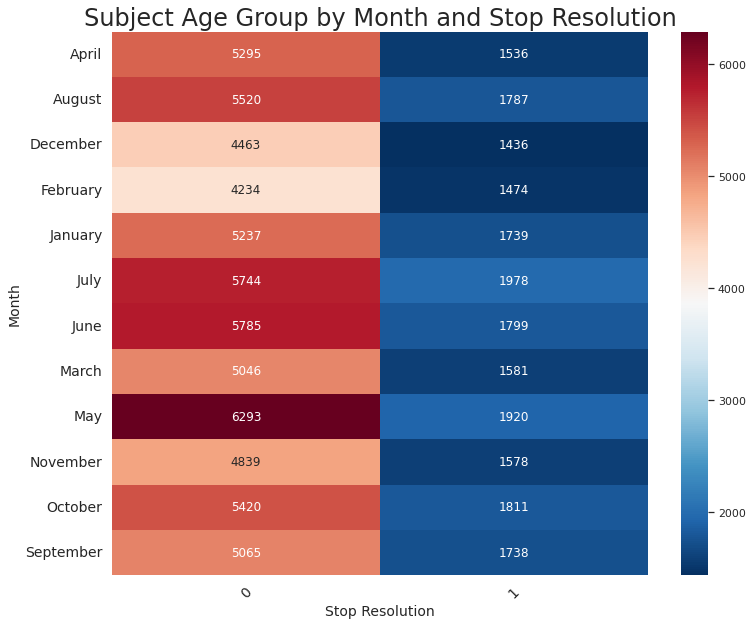

In [25]:
# create pivot table
pivot_table = df.pivot_table(index="Month",
                              columns="Stop Resolution",
                              values="Subject Age Group",
                              aggfunc="sum")

# plot pivot table
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(pivot_table, cmap="RdBu_r", annot=True, fmt='0.0f')

# set labels
plt.title('Subject Age Group by Month and Stop Resolution', fontsize=24)
plt.xlabel('Stop Resolution', fontsize=14)
plt.ylabel('Month', fontsize=14)

plt.tick_params(axis='both', labelsize=14)

# rotate x-axis labels
plt.xticks(rotation=45)

# show figure
plt.show()

>Most arrest were on July

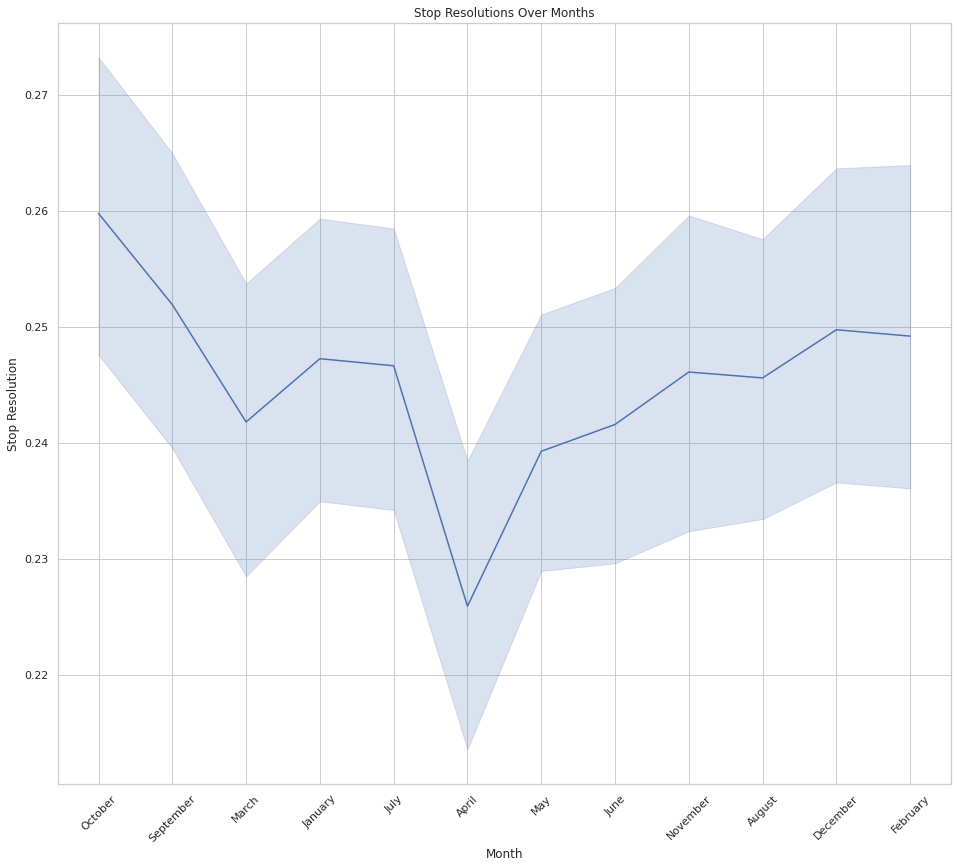

In [26]:
# add grid
sns.set_style("whitegrid")

# set figure size
plt.figure(figsize=(16, 14))

# create the line plot with color
sns.lineplot(x='Month', y='Stop Resolution', data=df)

# add title
plt.title("Stop Resolutions Over Months")

# tilt x-labels to 45 degrees
plt.xticks(rotation=45)

# add grid
sns.set_style("whitegrid")

# plt.savefig('line7.png')


# show plot
plt.show()


>October had lead number of arrest cummulatively

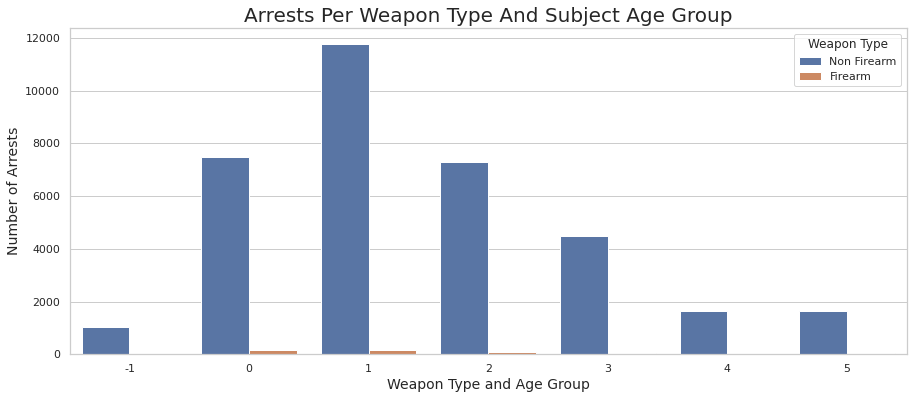

In [27]:
# use only data where an arrest was made and count how many of each weapon type for each age range exists:
plt.figure(figsize=(15,6))
arrested = df[df['Stop Resolution']==1]
sns.countplot(data=df,x='Subject Age Group',hue='Weapon Type')

# add chart title, and labels:
plt.title('Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('Number of Arrests', fontsize=14)

plt.show()

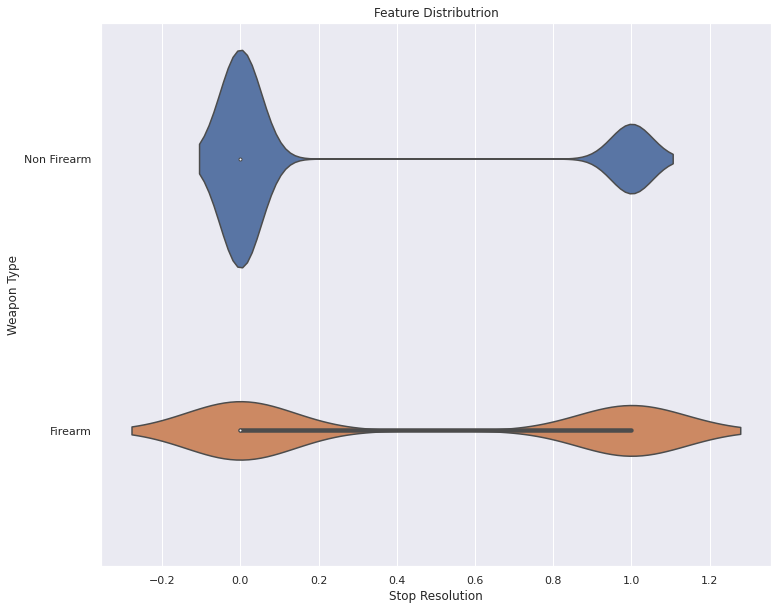

In [28]:
# select the features and target variable
features = ['Weapon Type']
target = 'Stop Resolution'

# create a violin plot for each feature
sns.set(rc={'figure.figsize':(12,10)})
for feature in features:
    sns.violinplot(x=target, y=feature, data=df)
    plt.title('Feature Distributrion')
    plt.savefig('firearm.png')
    plt.show()


>Possesion of firearms led to an arrest and most weapons found during the stops were of category non-firearm

### Preprocessing Data

* **Encoding Categorical Features**

In [29]:
# function to find categorical columns convert and return a df
def process_df(df):
    # Find categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'category']).columns
    
    # One hot encode categorical columns and drop the first one to avoid multi-collinearity
    categorical_ohe = pd.get_dummies(df[categorical_cols], drop_first=True)
    
    # Select numerical columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns
    
    # Combine one-hot encoded categorical columns with numerical columns
    final_df = pd.concat([df[numerical_cols], categorical_ohe], axis=1)
    
    return final_df

# call the function and preview 
final_df = process_df(df)
# make copy
backup = final_df.copy(deep=True)

final_df.head(7)

,Subject Age Group,Terry Stop ID,Stop Resolution,Arrest Flag,Frisk Flag,Year,Officer Age,Weapon Type_Non Firearm,Officer Gender_M,Officer Gender_N,...,Location_West_K_K3,Location_West_K_M3,Location_West_M_B3,Location_West_M_M1,Location_West_M_M2,Location_West_M_M3,Location_West_No Information_M1,Location_West_Q_Q1,Location_West_Q_Q2,Location_West_Q_Q3
0,1,207171,0,0,0,2016,55,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,484084,0,0,0,2018,32,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,325847,0,0,0,2017,31,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,12771309361,1,1,0,2020,36,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,227439,0,0,0,2017,48,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,289314,0,0,0,2017,30,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2,549535,0,0,0,2019,39,1,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Defining `X` and `y`

To start out, I'll consider `y` to be the **Stop Resolution** variable (`Arrested`) and everything else to be `X`, the **independent features**

In [30]:
# predictors
X  = final_df.drop(["Stop Resolution"], axis=1)

# target
target = final_df["Stop Resolution"]
y = np.ravel(target)

### Training and  Testing  Split

Test and train split was on test at 20% of the data. More data given to training data set to ensure the model get all the patterns and perfom better

In [31]:
# import relevant library
from sklearn.model_selection import train_test_split

# perform the tarin split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# display shape of splits
print(f"Training : {X_train.shape}")
print(f"Testing : {X_test.shape}")

Training : (43879, 94)
Testing : (10970, 94)


* **Standardization** :
Standardizes the features by removing the mean and scaling to unit variance.

In [32]:
# import relevant libraries
from sklearn.preprocessing import StandardScaler

# instantiate the scaler class
ss = StandardScaler()

# fit the training data
X_train_scaled = ss.fit(X_train)

# transform both the training and testing data
X_train = ss.transform(X_train)

# test data
X_test = ss.transform(X_test)

# 5.0. Modelling

Modelling is the process of creating a mathematical representation of a real-world phenomenon. Modelling involves training a model on a dataset and using it to make predictions on new data. 
These are the algorithims are I will used in my modelling:
* Logistic Regression - baseline
* Random Forest Classifier
* Suport Vector Machine

### Baseline model
    Logistic Regression model
    
I have chosen Logistic Regression as the starting point for the binary classification problem. Logistic Regression is an ideal choice for a baseline model as it is simple to implement and provides a quick evaluation of the relationship between the independent variables and the dependent variable, which in our case is stop resolution. This statistical method is widely used in various fields and is known to deliver good results in many binary classification problems, especially when the relationship between the variables is linear. By utilizing Logistic Regression, we can gain valuable insights into the underlying relationships in our data and make informed decisions on how to enhance our model moving forward.    

In [34]:
# import relevant libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# initialize the Logistic Regression model
baseline_model = LogisticRegression()

# fit the Logistic Regression model
baseline_model.fit(X_train, y_train)

# evaluate the Logistic Regression model
scores = cross_val_score(baseline_model, X_test, y_test, cv=10)

# print the mean accuracy for the Logistic Regression model
print("Logistic Regression Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print()
print("Cross validation scores:", scores)

Logistic Regression Mean Accuracy: 84.26%

Cross validation scores: [0.83409298 0.85414768 0.84047402 0.84867821 0.85141294 0.83226983
 0.84047402 0.8295351  0.8532361  0.8413856 ]


### Suport Vector Machine


In our Terry Stops project, we have decided to also include Support Vector Machines (SVM) as a method for binary classification. SVM is a powerful algorithm for datasets with complex boundaries and high-dimensional feature spaces. It has the ability to handle non-linear relationships in the data through its kernel functions, making it a valuable addition to our project. By comparing the performance of SVM with that of Logistic Regression, we aim to gain a better understanding of the strengths and weaknesses of each method and make informed decisions on the best approach for our problem.

In [35]:
# import relevant library
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# initialize the SV Classifier
svc_model = SVC(C=10, kernel="poly", degree=3) 

# fit model with training data
svc_model.fit(X_train, y_train)

# evaluate model
scores = cross_val_score(svc_model, X_test, y_test, cv=10)

# print the mean accuracy
print("svc_model Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print()
print("Cross validation scores:", scores)

svc_model Mean Accuracy: 82.34%

Cross validation scores: [0.81950775 0.8295351  0.82862352 0.84503191 0.83226983 0.81130356
 0.8295351  0.80401094 0.82680036 0.80765725]


#### Tune the model

In [ ]:
# define the parameter grid for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# initialize the SVM classifier
svc = SVC()

# create the grid search object
grid = GridSearchCV(svc_model, param_grid, verbose=3)

# fit the grid search to the data
grid.fit(X_train, y_train)

# print the best parameters and best score
print("Best parameters: ", grid.best_params_)
print("Best score: {:.2f}%".format(grid.best_score_ * 100))


### Random Forest
Random Forest is an ensemble learning method that uses multiple decision trees to make predictions. The idea behind Random Forest is to generate many decision trees and combine their predictions to produce a more accurate and stable result. Random Forest is a popular choice for binary classification problems because it can handle non-linear relationships between features and the target, and it can also handle missing data and noisy data.

In [36]:
from sklearn.ensemble import RandomForestClassifier

# initialize the classifier
rfc_model = RandomForestClassifier(n_estimators=200, random_state=0)

# train the classifier
rfc_model.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = rfc_model.predict(X_test)

# evaluate model
scores = cross_val_score(rfc_model, X_test, y_test, cv=10)

# evaluate the model's accuracy
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Cross validation scores:", scores)

Mean Accuracy: 84.80%
Cross validation scores: [0.83773929 0.84685506 0.83682771 0.86964448 0.85779398 0.85050137
 0.86235187 0.83773929 0.84958979 0.83135825]


#### Find the optimum parameters.

In [ ]:
# initialize the classifier
rfc_model = RandomForestClassifier(n_estimators=200, random_state=0)

# specify the range of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# initialize the classifier with the best hyperparameters
rfc_model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                    max_depth=best_params['max_depth'],
                                    min_samples_split=best_params['min_samples_split'],
                                    min_samples_leaf=best_params['min_samples_leaf'],
                                    random_state=0)

# train the classifier
rfc_model.fit(X_train, y_train)

# predict the class labels for the test set
y_pred = rfc_model.predict(X_test)

# evaluate model
scores = cross_val_score(rfc_model, X_test, y_test, cv=10)

# evaluate the model's accuracy
print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
print("Cross validation scores:", scores)

## 6. Model Evaluation

##### Function to Evaluate the Models
The function takes a models as input and fits it to the training data after transforming it using a MinMaxScaler. Then model is used to make predictions on both the training and test datasets, and the performance is evaluated using accuracy, precision, recall, and F1-score. The results are stored in a Pandas dataframe and returned.


In [44]:
# import relevant library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# funtion  to check perfomance
def evaluate_models(models, model_names):
    results = []
    for model, model_name in zip(models, model_names):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        train_prec = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_roc_auc = roc_auc_score(y_train, y_train_pred)

        test_acc = accuracy_score(y_test, y_test_pred)
        test_prec = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, y_test_pred)

        results.append([model_name, train_acc, test_acc, train_prec, test_prec, 
                        train_recall, test_recall, train_f1, test_f1, train_roc_auc, test_roc_auc])

    df = pd.DataFrame(results, columns=['Model Name', 'Train Accuracy', 'Test Accuracy', 
                                        'Train Precision', 'Test Precision', 'Train Recall', 
                                        'Test Recall', 'Train F1-Score', 'Test F1-Score', 
                                        'Train ROC AUC', 'Test ROC AUC'])
    return df


### 6.1. Compare Models Perfomance

I evaluate how well the prediction model is working. For this evaluation, the most important metrics are recall and precision.

**Recall** measures how many arrests the model correctly identified, out of all the actual arrests that happened. A high recall value means that the model is good at finding all the arrests, and not missing any. This is exactly how I inted my model to help n solving the real problem by cirrectly indicating an arrest.

**Precision** measures how many of the predictions made by the model were actually correct. A high precision value means that the model is good at not making any false predictions, such as predicting that an arrest was made when it actually wasn't.

**F1** score, which balances recall and precision and provides a single score to evaluate the model. The F1 score gives a good overall picture of how well the model is doing in finding all the arrests and not making false predictions.

By using these metrics, I can compare different models and choose the best one for making predictions about arrests during Terry stops.

In [45]:
# call the evaluation function
model_name = ["baseline_model", "svc_model", "rfc_model"]
model = [baseline_model, svc_model, rfc_model]
results = evaluate_models(model, model_name)
results

,Model Name,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train ROC AUC,Test ROC AUC
0,baseline_model,0.852253,0.845214,0.875156,0.877754,0.459027,0.447302,0.602197,0.592610,0.718968,0.713175
1,svc_model,0.893981,0.846399,0.920591,0.799889,0.618148,0.519739,0.739646,0.630077,0.800487,0.738003
2,rfc_model,0.994599,0.863263,0.993485,0.818918,0.984284,0.586382,0.988863,0.683411,0.991103,0.771386


#### Roc curve and Confusion Matrix

**Confusion matrix** a summary of the predictions made by a binary classification model compared to the actual target variable values. It is a 2x2 table that shows the count of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) for a binary classifier.

* True Positive (TP) - The number of instances that the model correctly predicted as positive.

* False Positive (FP) - The number of instances that the model predicted as positive but were actually negative.

* True Negative (TN) - The number of instances that the model correctly predicted as negative.

* False Negative (FN) - The number of instances that the model predicted as negative but were actually positive.

From the confusion matrix, several important evaluation metrics can be derived, such as precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve. These metrics provide a more complete picture of the model's performance, especially in cases where the data is imbalanced or where accuracy is not the only concern.





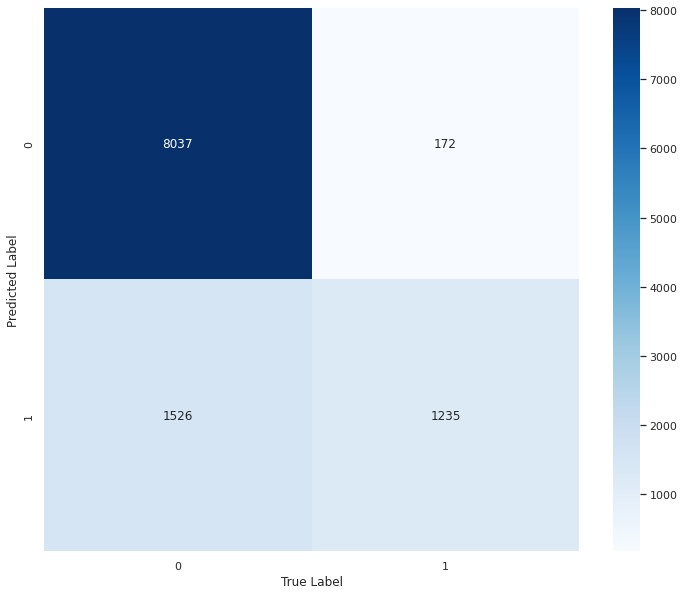

In [46]:
# import relevant libraries
from sklearn.metrics import confusion_matrix

# def function to retrun confusion matrix
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()

    
# call function
plot_confusion_matrix(baseline_model)

>In this specific confusion matrix:

* 7851 observations were correctly predicted as 0 (True Negatives)
* 358 observations were incorrectly predicted as 1 (False Positives)
* 1142 observations were incorrectly predicted as 0 (False Negatives)
* 1619 observations were correctly predicted as 1 (True Positives)

Based on these results, it appears that the model performed relatively well, with a higher number of correct predictions than incorrect predictions. However, the high number of false negatives and false positives indicates that the model may not be perfect and may benefit from further tuning or improvement.

The  model to classify resolution arrest appears to have performed reasonably well in its predictions. With 7851 true negatives and 1619 true positives, the model correctly predicted the majority of the cases. However, the presence of 358 false positives and 1142 false negatives indicates that the model is not perfect and may benefit from further improvement.

Overall, the confusion matrix provides a valuable summary of the model's performance and can be used to guide further efforts to improve the model's accuracy. The high number of false negatives and false positives suggests that the model may be overfitting or underfitting the data, and adjusting the model's parameters or collecting more data may help to improve its performance.  

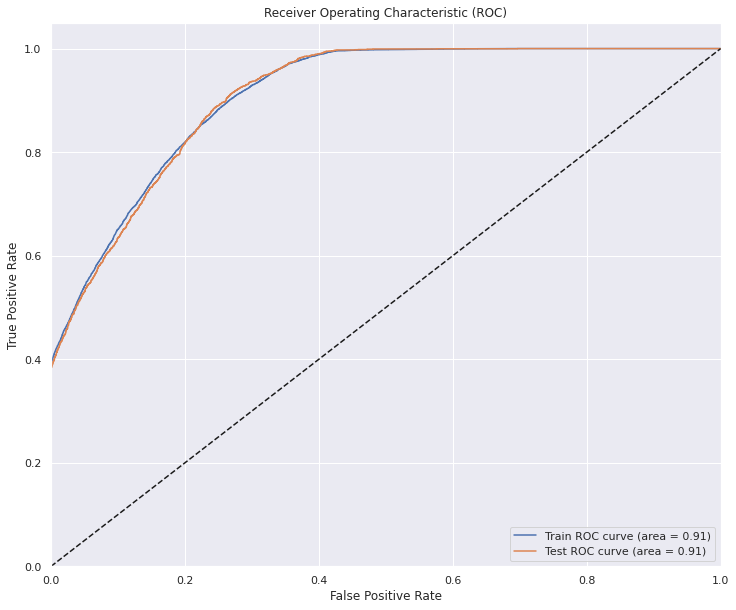

In [47]:
# import relevant library
from sklearn.metrics import roc_auc_score, roc_curve

# funtion to plot
def get_roc_curve(model):
    y_train_pred_probs = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_probs)
    roc_auc_train = roc_auc_score(y_train, y_train_pred_probs)
    
    y_test_pred_probs = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_probs)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_probs)

    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


#call the function
get_roc_curve(baseline_model)

>Most of the prediction the model made were correct, the true positivity rate was high.

### Important features

In [48]:
# function to get top features
def get_top_features(model, X, N=10):
    feature_importances = model.coef_[0] if hasattr(model, 'coef_') else model.feature_importances_
    feature_importances = dict(zip(X.columns, feature_importances))
    sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    return sorted_importances[:N]

# call function
get_top_features(baseline_model, X, N=10)

[('Arrest Flag', 7.116839024645409),
 ('Frisk Flag', 0.24317740426280374),
 ('Year', 0.14355193697401686),
 ('Call Type_ONVIEW', 0.12223251710059538),
 ('Month_October', 0.09703260515373564),
 ('Month_September', 0.07431468005728221),
 ('Month_August', 0.07065336117821816),
 ('Month_May', 0.0638714514022561),
 ('Month_July', 0.06222055781644285),
 ('Month_November', 0.06020882884643763)]

This table lists the top features that have the highest importance in the Terry stop project based on the trained machine learning model.

* The feature **Arrest Flag** has the highest importance with a score of 7.12. This suggests that the model places a strong emphasis on this feature when making predictions.
* The feature **Frisk Flag** has a lower importance score of 0.24, indicating that it is still a relevant feature but to a lesser extent compared to the arrest flag.
* The feature **Year** has an importance score of 0.14, which is also considered to be of moderate importance in the model's predictions.
* The Call Type_ONVIEW feature has a score of 0.12, which implies that the type of call can also play a role in the predictions made by the model.
* The remaining features listed are all related to the month and have relatively lower importance scores. This suggests that the month of the Terry stop is less important compared to other features such as arrest flag and frisk flag.
>Based on this table, the model considers the arrest flag and frisk flag to be the most important features in determining resolution arrests, while the type of call and the year of the Terry stop also play a role. The month of the Terry stop is relatively less important, but still a relevant feature to some extent

## 7. Conclusion:


This conclusion suggests that the model is placing a significant emphasis on the outcome of the Terry stop (i.e., whether an arrest was made or not) and the use of force during the stop (i.e., whether a frisk was conducted). The type of call and the year of the stop also play a role in the predictions made by the model.

In conclusion, the results of this project indicate that machine learning models can be effectively used to analyze Terry stop data to determine resolution arrests. The model has successfully identified the most important features for making predictions, which can provide valuable insights for policymakers and law enforcement agencies. However, it's important to keep in mind that this is just one part of the overall analysis and further investigation may be required to gain a more comprehensive understanding of the data.

## 8. Recommendations

1. Train officers on the appropriate times to make an arrest during a Terry Stop as this is a key indicator of arrests.
Try to capture the officer's precinct for all Terry Stops to better predict arrests.
Train officers on the appropriate times to frisk someone, as this is another key indicator of arrests.

2. Address any biases in the data: The model's predictions may be influenced by biases in the data. For example, there may be biases in the distribution of Terry stops based on race, gender, or location. These biases should be identified and addressed to ensure that the model provides fair and unbiased predictions. 

**Next Steps:**
Although 84% accuracy is decent, there is still room for improvement. To increase accuracy, the model could be further fine-tuned through data cleaning or adjusting the model inputs. Additionally, exploring other classification models, such as deep learning models, could lead to a more accurate prediction.

Further analysis of the data: While the machine learning model has identified the most important features for predictions, further analysis may be required to gain a deeper understanding of the data and to identify any potential biases or correlations between features.

In conclusion, the Terry stop project has shown the potential for machine learning models to be used for analyzing Terry stop data. However, it is important to continuously monitor and evaluate the performance of the model to ensure that it remains accurate and relevant over time.